In [108]:
import requests
import json
import pandas as pd
import functools as ft
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [80]:
data_endpoints_dict = {
    'Shooting Data' : 'https://data.cityofnewyork.us/resource/833y-fsy8.json',
    'Complaint Map' : 'https://data.cityofnewyork.us/resource/2fra-mtpn.json',
    'Use of Force' : 'https://data.cityofnewyork.us/resource/f4tj-796d.json'
}

sqf_datafiles = {
    '2022' : '/Users/ArsalanAnwar/Downloads/sqf-2022.xlsx',
    '2021' : '/Users/ArsalanAnwar/Downloads/sqf-2021.xlsx',
}

borough_mapping = {
    'PBBX': 'Bronx', 
    'PBSI': 'Staten Island', 
    'PBMN': 'Manhattan', 
    'PBMS': 'Manhattan',
    'PBBN': 'Brooklyn', 
    'PBBS': 'Brooklyn', 
    'PBQS': 'Queens', 
    'PBQN': 'Queens'
}

null_value_mapping = {
    '(null)' : None,
    'NaN' : None
}

In [81]:
class Loader:
    def __init__(self):
        print('[SUCCESS] Data Loader Initialized Successfully!')
        
    def load_file(self, api_endpoint):
        data = requests.get(api_endpoint)
        data = json.loads(data.text)
        data_df = pd.json_normalize(data)
        data = None
        return data_df
    
    def load_excel_file(self, filepath):
        df = pd.read_excel(filepath)
        return df

        

In [95]:
data_loader = Loader()
sqf_2022_df = data_loader.load_excel_file(sqf_datafiles['2022'])
sqf_2022_df

[SUCCESS] Data Loader Initialized Successfully!


,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,2022-01-01,08:40:00,2022,January,Saturday,Based on Self Initiated,APP,POM,73,...,(null),73,C,(null),LIVONIA AVENUE && THATFORD AVENUE,LIVONIA AVENUE,1008275,183622,PBBN,BROOKLYN
1,2,2022-01-01,03:25:00,2022,January,Saturday,Based on Self Initiated,APP,POM,183,...,(null),42,A,(null),WASHINGTON AVE && E 171 ST,WASHINGTON AVE,1010997,244468,PBBX,BRONX
2,3,2022-01-01,00:19:00,2022,January,Saturday,Based on Self Initiated,APP,POF,52,...,NaN,42,A,(null),E 170 ST && PARK AVE,E 170 ST,1010321,243768,PBBX,BRONX
3,4,2022-01-01,03:00:00,2022,January,Saturday,Based on Radio Run,APP,POM,9,...,(null),9,A,(null),AVENUE A && E 1 ST,AVENUE A,988051,202409,PBMS,MANHATTAN
4,5,2022-01-01,03:00:00,2022,January,Saturday,Based on Radio Run,APP,POM,9,...,(null),9,A,(null),AVENUE A && E 1 ST,AVENUE A,988051,202409,PBMS,MANHATTAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15097,15098,2022-12-31,17:09:00,2022,December,Saturday,Based on Self Initiated,APP,POM,808,...,(null),43,A,(null),RANDALL AVE && COMMONWEALTH AVE,RANDALL AVE,1021687,236876,PBBX,BRONX
15098,15099,2022-12-31,04:00:00,2022,December,Saturday,Based on Radio Run,APP,POM,42,...,(null),42,D,(null),E 163 ST && EAGLE AVE,E 163 ST,1009784,239429,PBBX,BRONX
15099,15100,2022-12-31,02:28:00,2022,December,Saturday,Based on Self Initiated,APP,POM,115,...,(null),115,D,(null),37-11 94 ST,94 ST,1019464,212685,PBQN,QUEENS
15100,15101,2022-12-31,20:25:00,2022,December,Saturday,Based on Radio Run,APP,POM,44,...,(null),44,E,(null),1310 SHERIDAN AVE,SHERIDAN AVE,1008017,244068,PBBX,BRONX


## EDA
#### Understanding and Preprocessing the data

In [96]:
sqf_2022_df.describe()

,STOP_ID,STOP_FRISK_DATE,YEAR2,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_COMMAND_CODE,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,STOP_LOCATION_PRECINCT
count,15102.000000,15102,15102.0,15102.000000,15102.000000,15102.000000,15102.000000,15102.000000
mean,7551.500000,2022-06-25 15:51:59.427890432,2022.0,145.736128,146.622434,4.262349,9.258774,60.411866
min,1.000000,2022-01-01 00:00:00,2022.0,1.000000,1.000000,0.000000,0.000000,1.000000
25%,3776.250000,2022-04-01 00:00:00,2022.0,44.000000,44.000000,1.000000,3.000000,40.000000
50%,7551.500000,2022-06-19 00:00:00,2022.0,69.000000,69.000000,1.000000,5.000000,52.000000
75%,11326.750000,2022-09-23 00:00:00,2022.0,109.000000,110.000000,2.000000,10.000000,81.000000
max,15102.000000,2022-12-31 00:00:00,2022.0,879.000000,879.000000,22041.000000,830.000000,123.000000
std,4359.716218,NaN,0.0,226.498065,226.334571,183.798874,17.529006,31.452425


In [97]:
sqf_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15102 entries, 0 to 15101
Data columns (total 82 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   STOP_ID                                                       15102 non-null  int64         
 1   STOP_FRISK_DATE                                               15102 non-null  datetime64[ns]
 2   STOP_FRISK_TIME                                               15102 non-null  object        
 3   YEAR2                                                         15102 non-null  int64         
 4   MONTH2                                                        15102 non-null  object        
 5   DAY2                                                          15102 non-null  object        
 6   STOP_WAS_INITIATED                                            15102 non-null  object        
 7   RECO

##### To achieve consistency in borough information

In [98]:
sqf_2022_df.STOP_LOCATION_PATROL_BORO_NAME.unique()

array(['PBBN', 'PBBX', 'PBMS', 'PBBS', 'PBMN', 'PBQN', 'PBQS', 'PBSI'],
      dtype=object)

In [99]:
sqf_2022_df.STOP_LOCATION_PATROL_BORO_NAME = sqf_2022_df.STOP_LOCATION_PATROL_BORO_NAME.map(borough_mapping)
print(sqf_2022_df.STOP_LOCATION_PATROL_BORO_NAME.unique())

['Brooklyn' 'Bronx' 'Manhattan' 'Queens' 'Staten Island']


In [100]:
sqf_2022_df.STOP_LOCATION_BORO_NAME = sqf_2022_df.STOP_LOCATION_BORO_NAME.str.title()
sqf_2022_df.STOP_LOCATION_BORO_NAME.unique()

array(['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [101]:
sqf_2022_df.tail()

,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
15097,15098,2022-12-31,17:09:00,2022,December,Saturday,Based on Self Initiated,APP,POM,808,...,(null),43,A,(null),RANDALL AVE && COMMONWEALTH AVE,RANDALL AVE,1021687,236876,Bronx,Bronx
15098,15099,2022-12-31,04:00:00,2022,December,Saturday,Based on Radio Run,APP,POM,42,...,(null),42,D,(null),E 163 ST && EAGLE AVE,E 163 ST,1009784,239429,Bronx,Bronx
15099,15100,2022-12-31,02:28:00,2022,December,Saturday,Based on Self Initiated,APP,POM,115,...,(null),115,D,(null),37-11 94 ST,94 ST,1019464,212685,Queens,Queens
15100,15101,2022-12-31,20:25:00,2022,December,Saturday,Based on Radio Run,APP,POM,44,...,(null),44,E,(null),1310 SHERIDAN AVE,SHERIDAN AVE,1008017,244068,Bronx,Bronx
15101,15102,2022-12-31,20:25:00,2022,December,Saturday,Based on Radio Run,APP,POM,44,...,(null),44,E,(null),1310 SHERIDAN AVE,SHERIDAN AVE,1008017,244068,Bronx,Bronx


In [102]:
sqf_2022_df = sqf_2022_df.replace(null_value_mapping)
sqf_2022_df


,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,2022-01-01,08:40:00,2022,January,Saturday,Based on Self Initiated,APP,POM,73,...,None,73,C,None,LIVONIA AVENUE && THATFORD AVENUE,LIVONIA AVENUE,1008275,183622,Brooklyn,Brooklyn
1,2,2022-01-01,03:25:00,2022,January,Saturday,Based on Self Initiated,APP,POM,183,...,None,42,A,None,WASHINGTON AVE && E 171 ST,WASHINGTON AVE,1010997,244468,Bronx,Bronx
2,3,2022-01-01,00:19:00,2022,January,Saturday,Based on Self Initiated,APP,POF,52,...,None,42,A,None,E 170 ST && PARK AVE,E 170 ST,1010321,243768,Bronx,Bronx
3,4,2022-01-01,03:00:00,2022,January,Saturday,Based on Radio Run,APP,POM,9,...,None,9,A,None,AVENUE A && E 1 ST,AVENUE A,988051,202409,Manhattan,Manhattan
4,5,2022-01-01,03:00:00,2022,January,Saturday,Based on Radio Run,APP,POM,9,...,None,9,A,None,AVENUE A && E 1 ST,AVENUE A,988051,202409,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15097,15098,2022-12-31,17:09:00,2022,December,Saturday,Based on Self Initiated,APP,POM,808,...,None,43,A,None,RANDALL AVE && COMMONWEALTH AVE,RANDALL AVE,1021687,236876,Bronx,Bronx
15098,15099,2022-12-31,04:00:00,2022,December,Saturday,Based on Radio Run,APP,POM,42,...,None,42,D,None,E 163 ST && EAGLE AVE,E 163 ST,1009784,239429,Bronx,Bronx
15099,15100,2022-12-31,02:28:00,2022,December,Saturday,Based on Self Initiated,APP,POM,115,...,None,115,D,None,37-11 94 ST,94 ST,1019464,212685,Queens,Queens
15100,15101,2022-12-31,20:25:00,2022,December,Saturday,Based on Radio Run,APP,POM,44,...,None,44,E,None,1310 SHERIDAN AVE,SHERIDAN AVE,1008017,244068,Bronx,Bronx


In [104]:
drop_cols = ['ISSUING_OFFICER_COMMAND_CODE', 'SUPERVISING_OFFICER_COMMAND_CODE', 'LOCATION_IN_OUT_CODE', 'JURISDICTION_DESCRIPTION', 'RECORD_STATUS_CODE', 'STOP_LOCATION_APARTMENT']
preprocessed_df = sqf_2022_df.drop(drop_cols, axis=1)
preprocessed_df.head()

,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,SUPERVISING_OFFICER_RANK,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,...,SUSPECT_HAIR_COLOR,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,2022-01-01,08:40:00,2022,January,Saturday,Based on Self Initiated,POM,LT,Y,...,BLK,None,73,C,LIVONIA AVENUE && THATFORD AVENUE,LIVONIA AVENUE,1008275,183622,Brooklyn,Brooklyn
1,2,2022-01-01,03:25:00,2022,January,Saturday,Based on Self Initiated,POM,SGT,Y,...,BLK,None,42,A,WASHINGTON AVE && E 171 ST,WASHINGTON AVE,1010997,244468,Bronx,Bronx
2,3,2022-01-01,00:19:00,2022,January,Saturday,Based on Self Initiated,POF,LT,Y,...,BLK,NaN,42,A,E 170 ST && PARK AVE,E 170 ST,1010321,243768,Bronx,Bronx
3,4,2022-01-01,03:00:00,2022,January,Saturday,Based on Radio Run,POM,LT,N,...,BLK,None,9,A,AVENUE A && E 1 ST,AVENUE A,988051,202409,Manhattan,Manhattan
4,5,2022-01-01,03:00:00,2022,January,Saturday,Based on Radio Run,POM,LT,N,...,BLK,None,9,A,AVENUE A && E 1 ST,AVENUE A,988051,202409,Manhattan,Manhattan


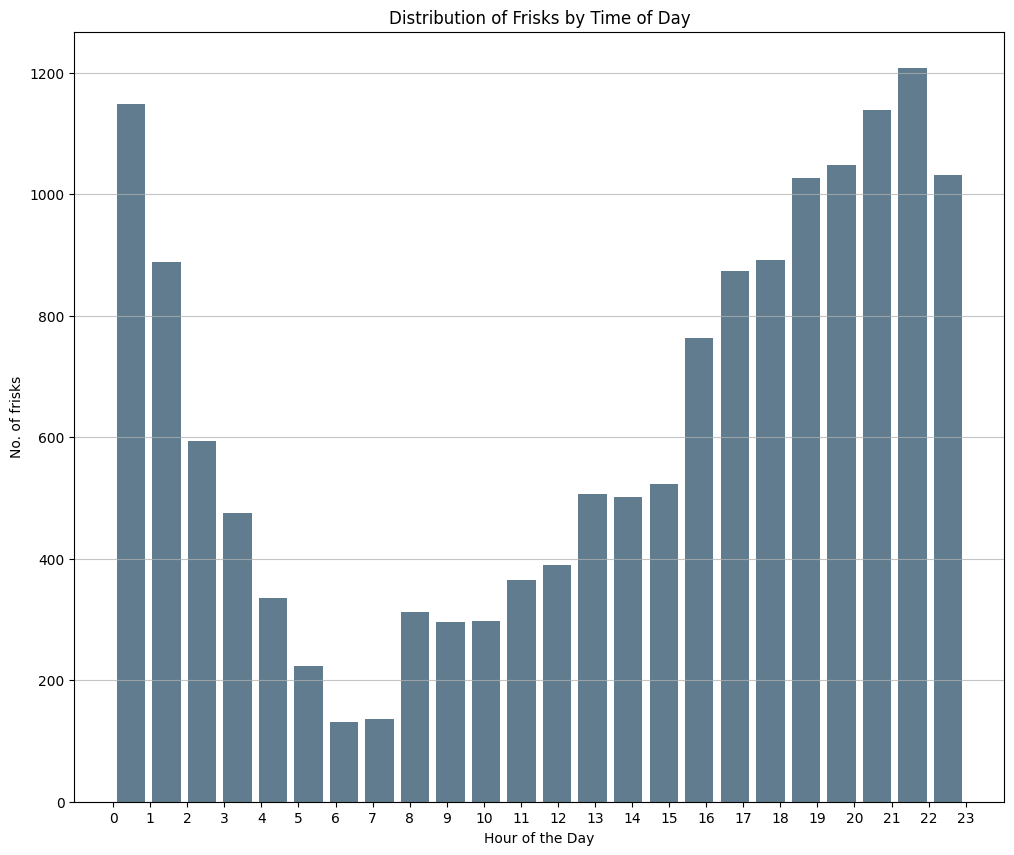

In [117]:
preprocessed_df['STOP_FRISK_HOUR'] = preprocessed_df['STOP_FRISK_TIME'].apply(lambda x: x.hour)

# Plotting the histogram with 24 hourly bins
plt.figure(figsize=(12, 10))
preprocessed_df['STOP_FRISK_HOUR'].plot(kind='hist', bins=24, rwidth=0.8, color='#607c8e')
plt.title('Distribution of Frisks by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('No. of frisks')
plt.xticks(range(24))
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

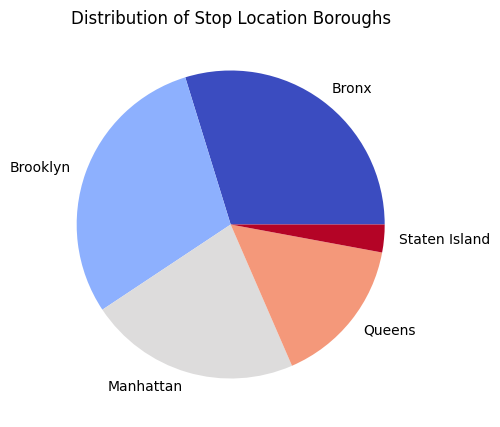

In [123]:
plt.figure(figsize=(6, 5))
preprocessed_df.groupby('STOP_LOCATION_BORO_NAME').size().plot.pie(colormap='coolwarm')
plt.title('Distribution of Stop Location Boroughs')

plt.show()

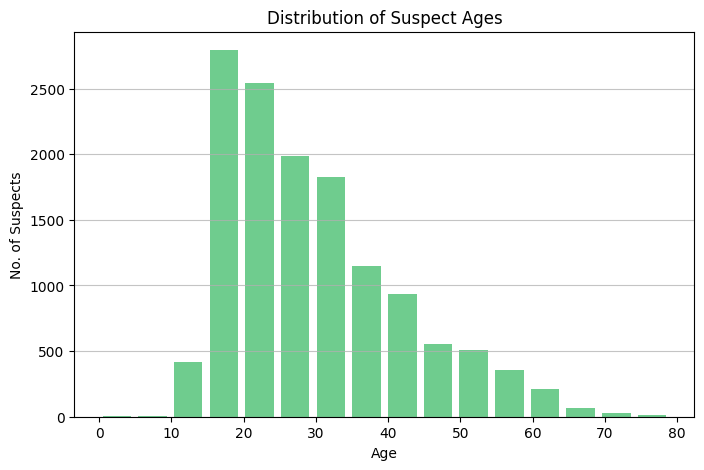

In [144]:
plt.figure(figsize=(8, 5))
preprocessed_df['SUSPECT_REPORTED_AGE'].plot(kind='hist', bins=16, rwidth=0.8, color='#6fcc8e')
plt.title('Distribution of Suspect Ages')
plt.xlabel('Age')
plt.ylabel('No. of Suspects')
#plt.xticks(range(20))
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

<Figure size 500x800 with 0 Axes>

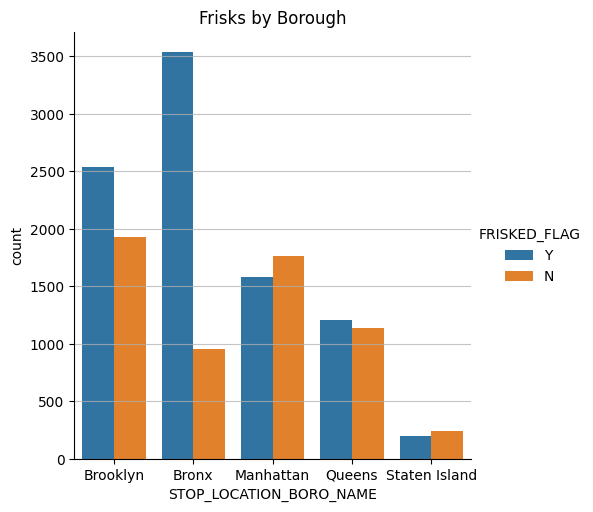

In [149]:
plt.figure(figsize=(5, 8))

sns.catplot(x='STOP_LOCATION_BORO_NAME', hue='FRISKED_FLAG', data=preprocessed_df, kind='count', edgecolor='0.6')
plt.title('Frisks by Borough'); 
plt.grid(axis='y', alpha=0.75)
plt.show()

<Figure size 1000x1200 with 0 Axes>

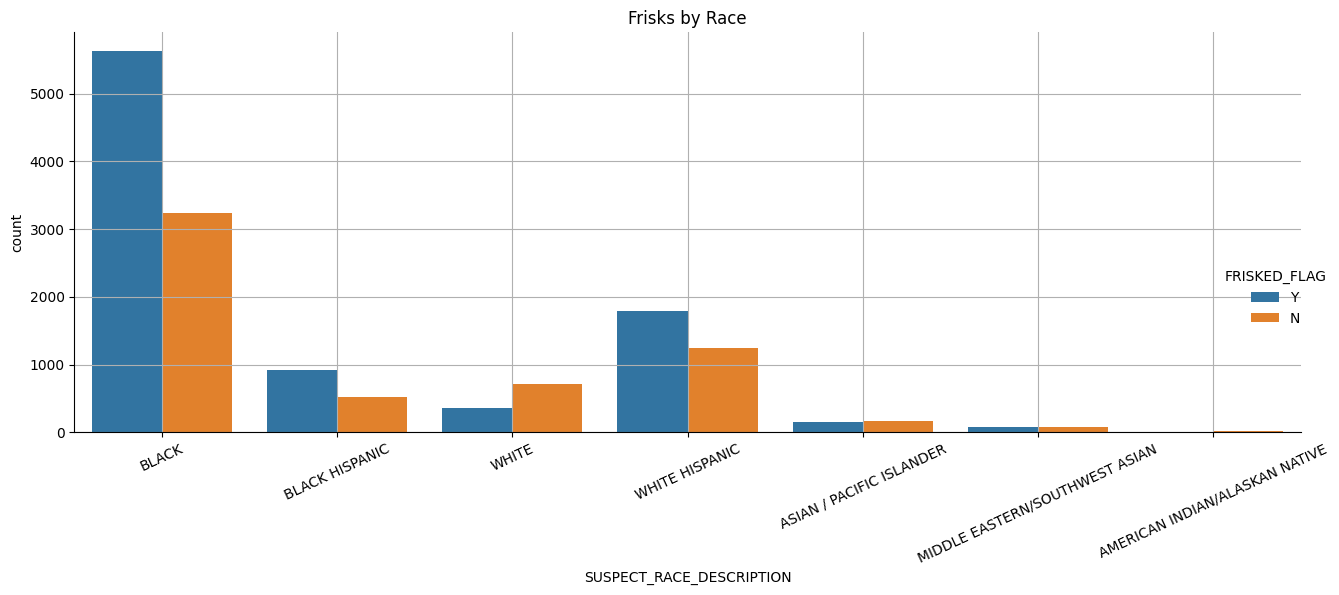

In [157]:
plt.figure(figsize=(10, 12))
sns.catplot(x='SUSPECT_RACE_DESCRIPTION', hue='FRISKED_FLAG', data=preprocessed_df, kind='count', edgecolor='0.6')
plt.title('Frisks by Race'); 
plt.grid()
plt.xticks(rotation=25)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=0.8, wspace=0.01, hspace=0.2)
plt.show()

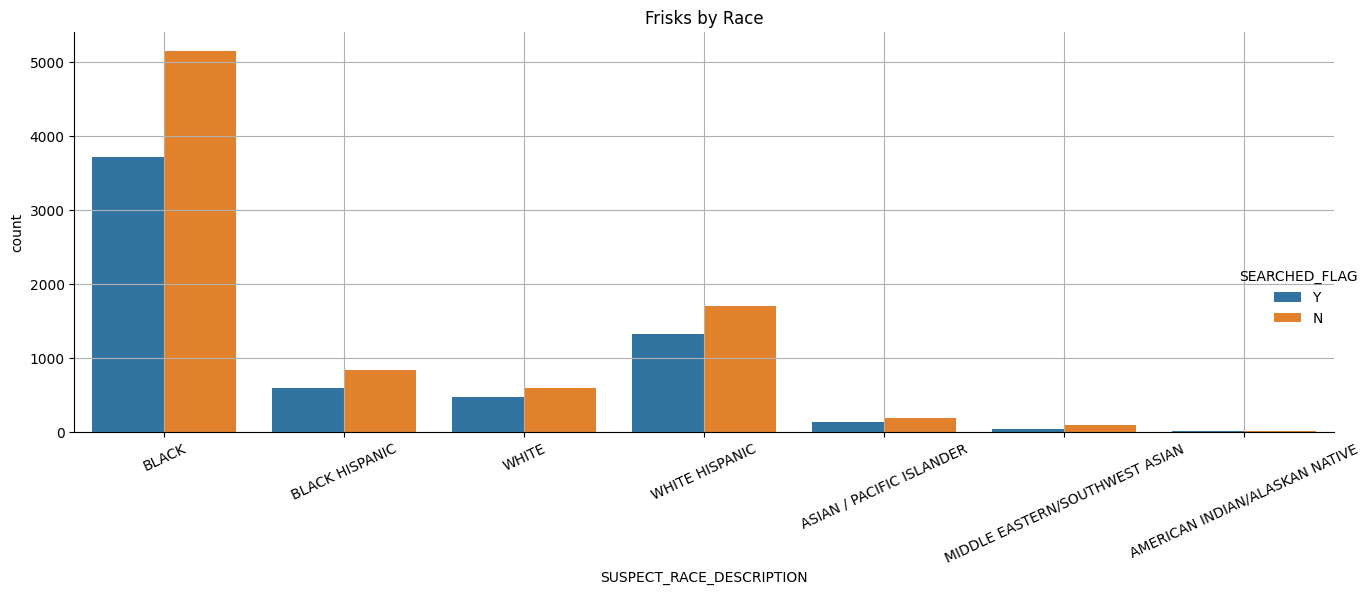

In [139]:
sns.catplot(x='SUSPECT_RACE_DESCRIPTION', hue='SEARCHED_FLAG', data=preprocessed_df, kind='count', edgecolor='0.6')
plt.title('Frisks by Race'); 
plt.grid()
plt.xticks(rotation=25)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=0.8, wspace=0.01, hspace=0.2)

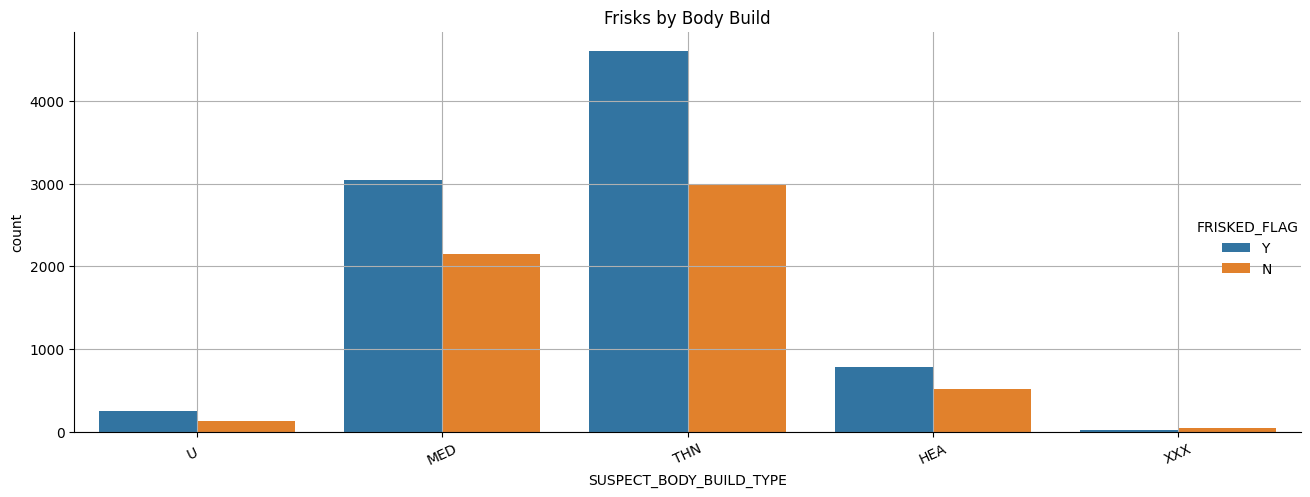

In [161]:
sns.catplot(x='SUSPECT_BODY_BUILD_TYPE', hue='FRISKED_FLAG', data=preprocessed_df, kind='count', edgecolor='0.6')
plt.title('Frisks by Body Build'); 
plt.grid()
plt.xticks(rotation=25)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=0.8, wspace=0.01, hspace=0.2)

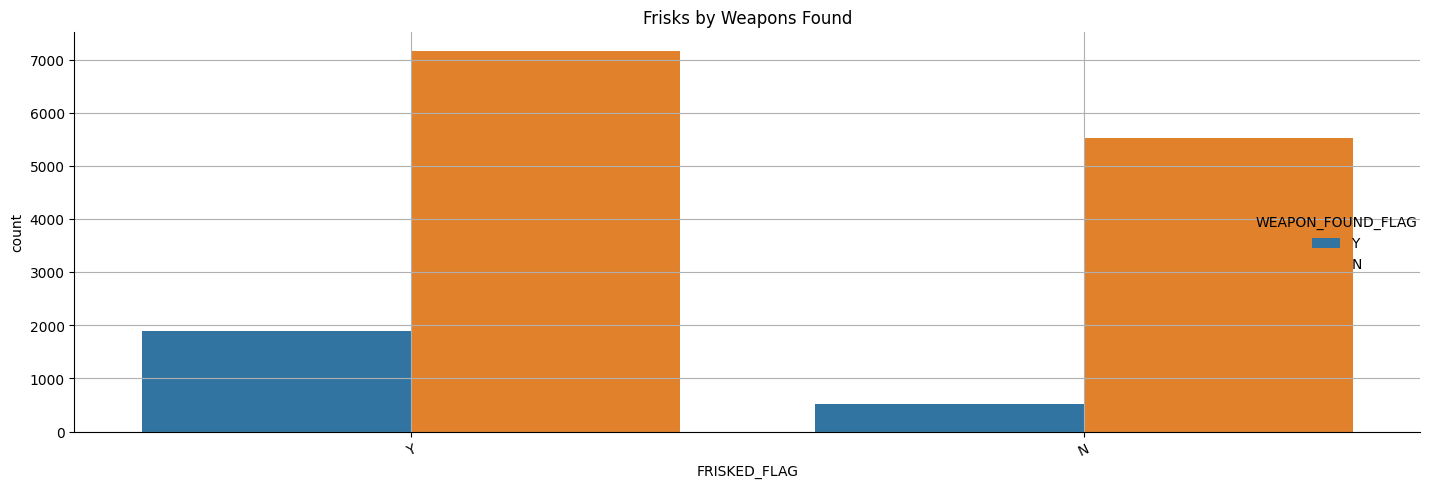

In [162]:
sns.catplot(x='FRISKED_FLAG', hue='WEAPON_FOUND_FLAG', data=preprocessed_df, kind='count', edgecolor='0.6')
plt.title('Frisks by Weapons Found'); 
plt.grid()
plt.xticks(rotation=25)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=0.8, wspace=0.01, hspace=0.2)

In [171]:
preprocessed_df.groupby(['FRISKED_FLAG', 'WEAPON_FOUND_FLAG'])['WEAPON_FOUND_FLAG'].count()

FRISKED_FLAG  WEAPON_FOUND_FLAG
N             N                    5525
              Y                     511
Y             N                    7166
              Y                    1900
Name: WEAPON_FOUND_FLAG, dtype: int64

In [172]:
preprocessed_df.groupby(['SEARCHED_FLAG', 'WEAPON_FOUND_FLAG'])['WEAPON_FOUND_FLAG'].count()

SEARCHED_FLAG  WEAPON_FOUND_FLAG
N              N                    8265
               Y                     461
Y              N                    4426
               Y                    1950
Name: WEAPON_FOUND_FLAG, dtype: int64